In [1]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import vedo
import k3d
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
alpha0 = (0, -1, 0, -1)
T0 = (1, 0, 0, 0)
N0 = (0, 1, 0, 0)
B0 = (0, 0, 1, 0)
Q0 = (0, 0, 0, 1)
y0 = np.stack((alpha0, T0, N0, B0, Q0)).flatten()

kappa = 1
tau = 1
xi = 1

frenet_mat = np.array([
    [0, kappa, 0, 0],
    [-kappa, 0, tau, 0],
    [0, -tau, 0, xi],
    [0, 0, -xi, 0]
])
velocity_mat = np.array([1, 1, 1, 1])

def ode_rhs(t, y):
    # reshape variables into alpha, T, N, B, Q
    vecs = np.reshape(y, (5, 4))
    # calculate gradient for T, N, B, Q
    frenet_rhs = frenet_mat @ vecs[1:]
    # calculate gradient for alpha (velocity * T)
    alpha_rhs = velocity_mat * vecs[[1]
    # concatenate flatten into a vector again
    return np.concatenate((alpha_rhs, frenet_rhs), axis=0).flatten()

In [37]:
min_t, max_t, steps = 0, 500, 2000

ts = np.linspace(min_t, max_t, steps)
res = solve_ivp(ode_rhs, (min_t, max_t), y0, t_eval=ts)
ys = res['y']
alpha = ys[:4].T

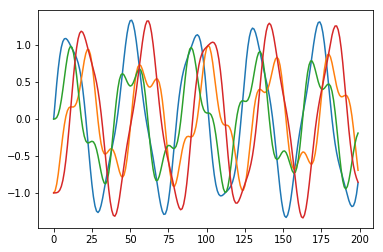

In [39]:
plt.plot(alpha[:200])

In [40]:
lines = [k3d.line(alpha[:, np.delete(np.arange(4), i)] + [20*i, 0, 0], color=i) for i in range(4)]
plots = [k3d.plot(256) for i in range(4)]
for l, p in zip(lines, plots):
    p += l

In [41]:
lines = [vedo.Line(alpha[:, np.delete(np.arange(4), i)] + [5*i, 0, 0], c=i, ) for i in range(4)]
texts = [vedo.Text(txt, pos=(5*i, 1, 0)) for i, txt in enumerate(['xyz', 'xyw', 'xzw', 'yzw'])]
vedo.show(lines, texts, axes=1)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[8.603911317563552,…

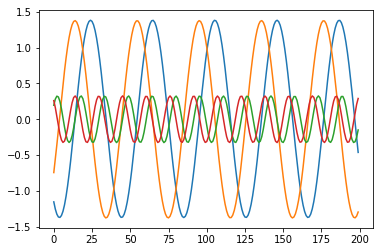

In [42]:
pca = PCA(n_components=4)
alpha_pca = pca.fit_transform(alpha)
plt.plot(alpha_pca[:200])

In [43]:
lines_pca = [vedo.Line(alpha_pca[:, np.delete(np.arange(4), i)] + [5*i, 0, 0], c=i, ) for i in range(4)]
vedo.show(lines_pca, texts, axes=1)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[8.418304124764626,…

In [44]:
from ipywidgets import interactive, FloatSlider
rotate_plot = k3d.line(vertices=alpha_pca[:, [0, 1, 3]], color=0xff, colors=[])

@interactive
def update_angle(theta=FloatSlider(0, min=0, max=2*np.pi)):
    new_alpha = np.stack((
        alpha_pca[:, 0], 
        np.cos(theta)*alpha_pca[:, 1] + np.sin(theta)*alpha_pca[:, 2],
        alpha_pca[:, 3]
    ), axis=1)
    rotate_plot.vertices = new_alpha

/Users/unspun/.pyenv/versions/3.7.4/envs/unspun_analysis/lib/python3.7/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [45]:
update_angle

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586), Output()), _dom_clas…

In [46]:
rotate_plot

Output()

In [192]:
rotate_plot.colors = [0xff]*2000

In [47]:
from ipywidgets import TwoByTwoLayout
from IPython.display import HTML
p = k3d.plot()
p += rotate_plot
TwoByTwoLayout(
    top_left=plots[0],
    bottom_left=plots[1],
    top_right=plots[2],
    bottom_right=plots[3]
)

TwoByTwoLayout(children=(Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, c…

[Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[4.5, 4.5, 4.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], camera_fov=60.0, fps_meter=False, grid=[-1, -1, -1, 1, 1, 1], height=256, lighting=1.5, object_ids=[5067198288], screenshot_scale=2.0),
 Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[4.5, 4.5, 4.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], camera_fov=60.0, fps_meter=False, grid=[-1, -1, -1, 1, 1, 1], height=256, lighting=1.5, object_ids=[5067195024], screenshot_scale=2.0),
 Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[4.5, 4.5, 4.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], camera_fov=60.0, fps_meter=False, grid=[-1, -1, -1, 1, 1, 1], height=256, lighting=1.5, object_ids=[5067150544], screenshot_scale=2.0),
 Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[4.5, 4.5, 4.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], camera_fov=60.0, fps_meter=False, gr